In [1]:
import numpy as np
import pandas as pd

# --- Setup ---
# Inputs (x1, x2)
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
# Target outputs for x1 NOR x2
targets = np.array([1, 0, 0, 0])

# Add bias input (x0 = 1)
X = np.insert(inputs, 0, 1, axis=1)

# --- Training Parameters ---
weights = np.array([0.0, 0.0, 0.0])
learning_rate = 1
max_epochs = 10 # Set a max number of epochs to prevent infinite loops

# Store training data for CSV export
training_data = []

# --- Table Header ---
header = "| Epoch | x₁ | x₂ | t | x = (1, x₁, x₂) | Current w = (w₀, w₁, w₂) | w · x | y | e | Δw = e · x      | New w = (w₀, w₁, w₂) |"
separator = "|:-----:|:--:|:--:|:-:|:---------------:|:-------------------------:|:-----:|:-:|:-:|:----------------:|:---------------------:|"
print(header)
print(separator)

# Initial state print
initial_w_str = f"({weights[0]:.0f}, {weights[1]:.0f}, {weights[2]:.0f})"
print(f"|       |    |    |   |                 | **{initial_w_str}** |       |   |   |                  |                       |")


# --- Training Loop ---
for epoch in range(1, max_epochs + 1):
    updates_in_epoch = 0
    for i in range(len(X)):
        x_vec = X[i]
        target = targets[i]
        
        # Store current weights for printing
        current_w_str = f"({weights[0]:.0f}, {weights[1]:.0f}, {weights[2]:.0f})"
        
        # 1. Calculate net input
        net_input = np.dot(weights, x_vec)
        
        # 2. Apply step function
        y = 1 if net_input >= 0 else 0
        
        # 3. Calculate error
        error = target - y
        
        # 4. Calculate weight update
        delta_w = learning_rate * error * x_vec
        
        # Store data for CSV
        training_data.append({
            'Epoch': epoch,
            'x1': x_vec[1],
            'x2': x_vec[2],
            'target': target,
            'x0': x_vec[0],
            'w0_current': float(current_w_str.split(',')[0].strip('(').strip()),
            'w1_current': float(current_w_str.split(',')[1].strip()),
            'w2_current': float(current_w_str.split(',')[2].strip(')').strip()),
            'net_input': net_input,
            'y': y,
            'error': error,
            'delta_w0': delta_w[0],
            'delta_w1': delta_w[1],
            'delta_w2': delta_w[2],
            'w0_new': weights[0] + delta_w[0],
            'w1_new': weights[1] + delta_w[1],
            'w2_new': weights[2] + delta_w[2]
        })
        
        # 5. Update weights
        if error != 0:
            updates_in_epoch += 1
        weights += delta_w
        
        # --- Print table row ---
        x_str = f"({x_vec[0]}, {x_vec[1]}, {x_vec[2]})"
        delta_w_str = f"({delta_w[0]:.0f}, {delta_w[1]:.0f}, {delta_w[2]:.0f})"
        new_w_str = f"({weights[0]:.0f}, {weights[1]:.0f}, {weights[2]:.0f})"

        print(f"| **{epoch}** | {x_vec[1]}  | {x_vec[2]}  | {target} | {x_str: <15} | {current_w_str: <25} | {net_input: >5.0f} | {y} | {error: >1.0f} | {delta_w_str: <16} | {new_w_str: <21} |")

    # Check for convergence
    if updates_in_epoch == 0:
        print(f"\nConvergence reached in Epoch {epoch}. No further updates.")
        break

| Epoch | x₁ | x₂ | t | x = (1, x₁, x₂) | Current w = (w₀, w₁, w₂) | w · x | y | e | Δw = e · x      | New w = (w₀, w₁, w₂) |
|:-----:|:--:|:--:|:-:|:---------------:|:-------------------------:|:-----:|:-:|:-:|:----------------:|:---------------------:|
|       |    |    |   |                 | **(0, 0, 0)** |       |   |   |                  |                       |
| **1** | 0  | 0  | 1 | (1, 0, 0)       | (0, 0, 0)                 |     0 | 1 | 0 | (0, 0, 0)        | (0, 0, 0)             |
| **1** | 0  | 1  | 0 | (1, 0, 1)       | (0, 0, 0)                 |     0 | 1 | -1 | (-1, 0, -1)      | (-1, 0, -1)           |
| **1** | 1  | 0  | 0 | (1, 1, 0)       | (-1, 0, -1)               |    -1 | 0 | 0 | (0, 0, 0)        | (-1, 0, -1)           |
| **1** | 1  | 1  | 0 | (1, 1, 1)       | (-1, 0, -1)               |    -2 | 0 | 0 | (0, 0, 0)        | (-1, 0, -1)           |
| **2** | 0  | 0  | 1 | (1, 0, 0)       | (-1, 0, -1)               |    -1 | 0 | 1 | (1, 0, 0)        | (0, 0,

In [2]:
# Save training data to CSV file
df = pd.DataFrame(training_data)
df.to_csv('perceptron_training_data.csv', index=False)
print("Training data saved to 'perceptron_training_data.csv'")
print(f"Data shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

Training data saved to 'perceptron_training_data.csv'
Data shape: (16, 17)

First few rows:
   Epoch  x1  x2  target  x0  w0_current  w1_current  w2_current  net_input  \
0      1   0   0       1   1         0.0         0.0         0.0        0.0   
1      1   0   1       0   1         0.0         0.0         0.0        0.0   
2      1   1   0       0   1        -1.0         0.0        -1.0       -1.0   
3      1   1   1       0   1        -1.0         0.0        -1.0       -2.0   
4      2   0   0       1   1        -1.0         0.0        -1.0       -1.0   

   y  error  delta_w0  delta_w1  delta_w2  w0_new  w1_new  w2_new  
0  1      0         0         0         0     0.0     0.0     0.0  
1  1     -1        -1         0        -1    -1.0     0.0    -1.0  
2  0      0         0         0         0    -1.0     0.0    -1.0  
3  0      0         0         0         0    -1.0     0.0    -1.0  
4  0      1         1         0         0     0.0     0.0    -1.0  


In [3]:
%pip install graphviz


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


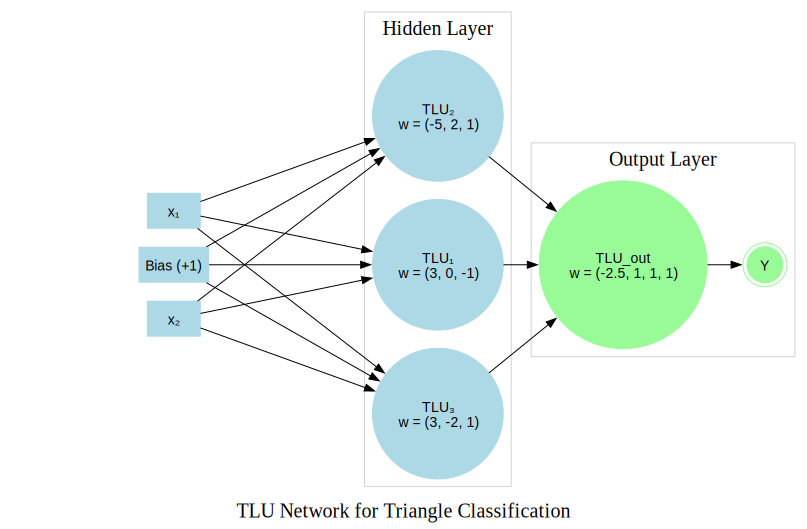

In [5]:
import graphviz

# Create a new directed graph
g = graphviz.Digraph('TLU_Network')
g.attr(rankdir='LR', splines='line', label='TLU Network for Triangle Classification', fontsize='20')

# Define graph-wide styles for nodes and edges
g.attr('node', shape='circle', style='filled', color='lightblue', fontname='Helvetica')
g.attr('edge', fontname='Helvetica', fontsize='10')

# 1. Input Layer
# Use a subgraph to align the input nodes
with g.subgraph(name='cluster_0') as c:
    c.attr(style='invis') # Make the subgraph box invisible
    c.node('x1', 'x₁', shape='plaintext')
    c.node('x2', 'x₂', shape='plaintext')
    c.node('bias_in', 'Bias (+1)', shape='plaintext')

# 2. Hidden Layer (Boundary Detectors)
with g.subgraph(name='cluster_1') as c:
    c.attr(label='Hidden Layer', color='lightgrey')
    c.node('TLU1', 'TLU₁\nw = (3, 0, -1)')
    c.node('TLU2', 'TLU₂\nw = (-5, 2, 1)')
    c.node('TLU3', 'TLU₃\nw = (3, -2, 1)')

# 3. Output Layer (AND Gate)
with g.subgraph(name='cluster_2') as c:
    c.attr(label='Output Layer', color='lightgrey')
    c.node('TLU_out', 'TLU_out\nw = (-2.5, 1, 1, 1)', color='palegreen')
    c.node('Y', 'Y', shape='doublecircle', color='palegreen')


# --- Define Edges (Connections) ---

# Connections from Inputs to Hidden Layer
g.edge('x1', 'TLU1')
g.edge('x1', 'TLU2')
g.edge('x1', 'TLU3')

g.edge('x2', 'TLU1')
g.edge('x2', 'TLU2')
g.edge('x2', 'TLU3')

g.edge('bias_in', 'TLU1')
g.edge('bias_in', 'TLU2')
g.edge('bias_in', 'TLU3')

# Connections from Hidden Layer to Output Layer
g.edge('TLU1', 'TLU_out')
g.edge('TLU2', 'TLU_out')
g.edge('TLU3', 'TLU_out')

# Connection from Output TLU to the final result
g.edge('TLU_out', 'Y')

# Simply calling the object 'g' at the end of the cell
# will render the diagram in the notebook's output.
g